In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Kaggle dataset link
# https://www.kaggle.com/competitions/its-a-fraud/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/dataset/DataSet/train.csv")
test = pd.read_csv("/content/drive/MyDrive/dataset/DataSet/test.csv")

In [4]:
df.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             337369
id_37             337369
id_38             337369
DeviceType        337504
DeviceInfo        353982
Length: 434, dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
len(df)

442905

In [7]:
print(df.columns.tolist())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

In [8]:
df.isna().sum().sum()

86667491

In [9]:
df.isna().any().sum()

414

In [10]:
Y_train = df.pop('isFraud')
dataframes_to_be_combined = [df,test]
df = pd.concat(dataframes_to_be_combined)

In [11]:
df.isna().sum().sum()

115523073

In [12]:
df.isna().any().sum()

414

In [13]:
# Checking feature DeviceInfo
df['DeviceInfo'].describe()

count      118666
unique       1786
top       Windows
freq        47722
Name: DeviceInfo, dtype: object

In [14]:
df['DeviceInfo'].isna().sum()

471874

In [15]:
df.drop("DeviceInfo", axis=1, inplace=True)

In [16]:
# removing all features where null values are greater than 50%
null = df.isnull().sum() / len(df)
missing_features = null[null > 0.50].index
df.drop(missing_features, axis=1, inplace=True)
missing_features

Index(['dist1', 'dist2', 'R_emaildomain', 'D5', 'D6', 'D7', 'D8', 'D9', 'D12',
       'D13',
       ...
       'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37',
       'id_38', 'DeviceType'],
      dtype='object', length=213)

In [17]:
# Dropping one row from any two rows which are correlated greater than 95% 
cor = df.corr().abs()
upper = cor.where(np.triu(np.ones(cor.shape),k=1).astype(bool))
drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(df[drop], axis=1, inplace=True)
drop

['TransactionDT',
 'C2',
 'C4',
 'C6',
 'C8',
 'C10',
 'C11',
 'C12',
 'C14',
 'D2',
 'V11',
 'V16',
 'V18',
 'V21',
 'V22',
 'V28',
 'V30',
 'V32',
 'V33',
 'V34',
 'V43',
 'V49',
 'V50',
 'V52',
 'V57',
 'V58',
 'V60',
 'V63',
 'V70',
 'V71',
 'V72',
 'V74',
 'V81',
 'V84',
 'V89',
 'V91',
 'V92',
 'V93',
 'V94',
 'V97',
 'V101',
 'V102',
 'V103',
 'V106',
 'V126',
 'V127',
 'V128',
 'V132',
 'V133',
 'V134',
 'V279',
 'V280',
 'V292',
 'V293',
 'V295',
 'V296',
 'V298',
 'V299',
 'V304',
 'V306',
 'V307',
 'V308',
 'V316',
 'V317',
 'V318']

In [18]:
# fill ing all columns with 25%ile vaue(median) where 25%ile and 75%ile values are same
from pandas.api.types import is_numeric_dtype
for column in df.columns[1:]:
    if(df[column].dtype.kind in 'biufc' and df[column].quantile(0.75) == df[column].quantile(0.25)):
        df[column].fillna(df[column].quantile(0.25), inplace = True)
        print(column)

card3
addr2
C3
C7
V1
V2
V3
V4
V5
V6
V7
V8
V9
V14
V15
V17
V19
V20
V23
V24
V25
V26
V27
V31
V37
V38
V39
V40
V41
V42
V44
V45
V46
V47
V51
V55
V56
V59
V61
V62
V64
V65
V66
V67
V68
V73
V77
V78
V79
V80
V82
V83
V85
V86
V87
V88
V95
V98
V100
V104
V105
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V129
V131
V135
V136
V137
V281
V284
V286
V287
V288
V289
V290
V291
V294
V297
V300
V301
V302
V303
V305
V309
V311
V312
V313
V314
V315
V319
V320
V321


In [19]:
for column in df.columns[1:]:
    if(df[column].isna().sum() > 0 and df[column].dtype != 'object'):
        print(column,df[column].mean(),df[column].median(),df[column].mode()[0])

card2 362.5554884999665 361.0 321.0
card5 199.27889697943476 226.0 226.0
addr1 290.73379392341195 299.0 299.0
D1 94.34756843625429 3.0 0.0
D3 28.343347718075332 8.0 0.0
D4 140.0024405978872 26.0 0.0
D10 123.98213667937759 15.0 0.0
D11 146.6214654959149 43.0 0.0
D15 163.744578971615 52.0 0.0
V10 0.4639152072429824 0.0 0.0
V12 0.5597113128733233 1.0 1.0
V13 0.5991657385216156 1.0 1.0
V29 0.3878402307631004 0.0 0.0
V35 0.5425942486556239 1.0 1.0
V36 0.5791978100960455 1.0 1.0
V48 0.3831738900446188 0.0 0.0
V53 0.5775858710979191 1.0 1.0
V54 0.6199819259744003 1.0 1.0
V69 0.3902002944819688 0.0 0.0
V75 0.5442781465407199 1.0 1.0
V76 0.5875570430176156 1.0 1.0
V90 0.40186207556803677 0.0 0.0
V96 3.0051895375669657 0.0 0.0
V99 0.8949859884179958 0.0 0.0
V130 92.16584942117251 0.0 0.0
V282 0.8171707075352427 1.0 1.0
V283 0.9911144447970458 1.0 1.0
V285 1.1676601278855532 0.0 0.0
V310 118.19565806086851 0.0 0.0


In [20]:
import seaborn as sns

In [21]:
df['card2'].describe()

count    581607.000000
mean        362.555488
std         157.793246
min         100.000000
25%         214.000000
50%         361.000000
75%         512.000000
max         600.000000
Name: card2, dtype: float64

In [22]:
df["card2"].fillna(df["card2"].mean(), inplace = True)

In [23]:
df['card5'].describe()

count    586281.000000
mean        199.278897
std          41.244453
min         100.000000
25%         166.000000
50%         226.000000
75%         226.000000
max         237.000000
Name: card5, dtype: float64

In [24]:
df["card5"].fillna(df["card5"].median(), inplace = True)

In [25]:
df['addr1'].describe()

count    524834.000000
mean        290.733794
std         101.741072
min         100.000000
25%         204.000000
50%         299.000000
75%         330.000000
max         540.000000
Name: addr1, dtype: float64

In [26]:
df['addr1'].fillna(df['addr1'].median(), inplace=True)

In [27]:
# df['dist1'].describe()

In [28]:
# df['dist1'].fillna(0, inplace=True)

In [29]:
df['P_emaildomain'].describe()

count        496084
unique           59
top       gmail.com
freq         228355
Name: P_emaildomain, dtype: object

In [30]:
df['P_emaildomain'].fillna('gmail.com', inplace=True)

In [31]:
#Filling all categorical dataset with their mode
for column in df.columns[1:]:
    if(df[column].isna().sum() > 0):
        if(df[column].dtype == 'object'):
            df[column].fillna(df[column].mode(dropna =True)[0], inplace = True)
            print(column)

card4
card6
M1
M2
M3
M4
M6


In [32]:
df['D4'].describe()

count    421618.000000
mean        140.002441
std         191.096774
min        -122.000000
25%           0.000000
50%          26.000000
75%         253.000000
max         869.000000
Name: D4, dtype: float64

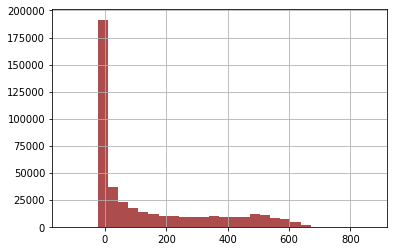

In [33]:
df['D4'].hist(bins=30,color='darkred',alpha=0.7)

In [34]:
df['D4'].fillna(df['D4'].median(), inplace=True)

In [35]:
df['D10'].describe()

count    514518.000000
mean        123.982137
std         182.615225
min           0.000000
25%           0.000000
50%          15.000000
75%         197.000000
max         876.000000
Name: D10, dtype: float64

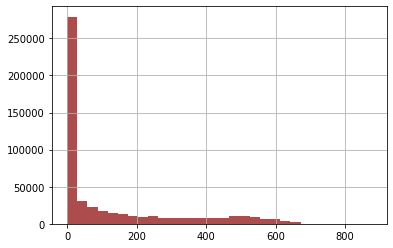

In [36]:
df['D10'].hist(bins=30,color='darkred',alpha=0.7)

In [37]:
df['D10'].fillna(df['D10'].median(), inplace=True)

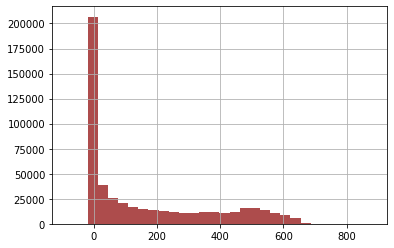

In [38]:
df['D15'].hist(bins=30,color='darkred',alpha=0.7)

In [39]:
df['D15'].fillna(df['D15'].median(), inplace=True)

In [40]:
df['V12'].describe()

count    514467.000000
mean          0.559711
std           0.510533
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: V12, dtype: float64

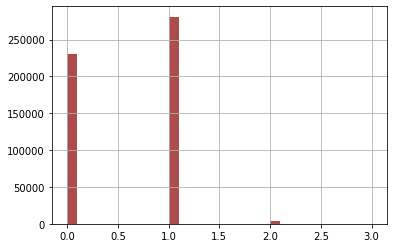

In [41]:
df['V12'].hist(bins=30,color='darkred',alpha=0.7)

In [42]:
df['V12'].fillna(df['V12'].mean(), inplace=True)

In [43]:
df['V13'].describe()

count    514467.000000
mean          0.599166
std           0.532185
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: V13, dtype: float64

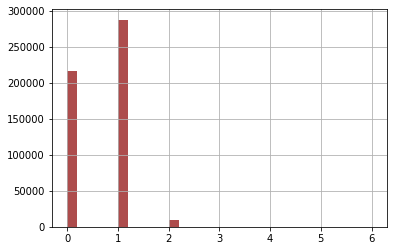

In [44]:
df['V13'].hist(bins=30,color='darkred',alpha=0.7)

In [45]:
df['V13'].fillna(df['V13'].mean(), inplace=True)

In [46]:
df["card5"].describe()

count    590540.000000
mean        199.471611
std          41.157610
min         100.000000
25%         166.000000
50%         226.000000
75%         226.000000
max         237.000000
Name: card5, dtype: float64

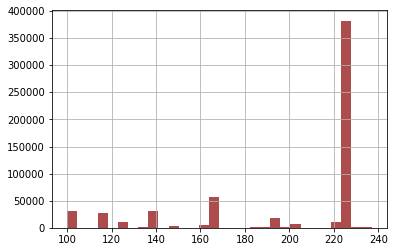

In [47]:
df['card5'].hist(bins=30,color='darkred',alpha=0.7)

In [48]:
df['card5'].fillna(df['card5'].median(), inplace=True)

In [49]:
df["D1"].describe()

count    589271.000000
mean         94.347568
std         157.660387
min           0.000000
25%           0.000000
50%           3.000000
75%         122.000000
max         640.000000
Name: D1, dtype: float64

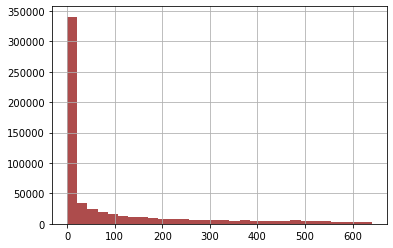

In [50]:
df['D1'].hist(bins=30,color='darkred',alpha=0.7)

In [51]:
df['D1'].fillna(df['D1'].median(), inplace=True)

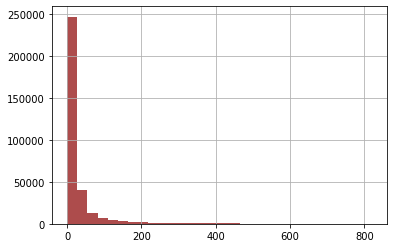

In [52]:
df['D3'].hist(bins=30,color='darkred',alpha=0.7)

In [53]:
df['D3'].fillna(df['D3'].median(), inplace=True)

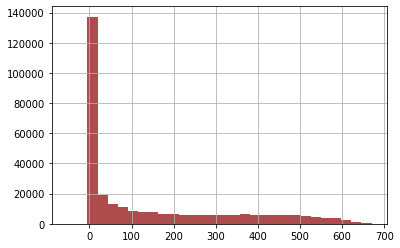

In [54]:
df['D11'].hist(bins=30,color='darkred',alpha=0.7)

In [55]:
df['D11'].fillna(df['D11'].median(), inplace=True)

In [56]:
for column in df.columns[1:]:
    if(df[column].isna().sum() > 0):
        print(column,df[column].mean(),df[column].median(),df[column].mode()[0])

V10 0.4639152072429824 0.0 0.0
V29 0.3878402307631004 0.0 0.0
V35 0.5425942486556239 1.0 1.0
V36 0.5791978100960455 1.0 1.0
V48 0.3831738900446188 0.0 0.0
V53 0.5775858710979191 1.0 1.0
V54 0.6199819259744003 1.0 1.0
V69 0.3902002944819688 0.0 0.0
V75 0.5442781465407199 1.0 1.0
V76 0.5875570430176156 1.0 1.0
V90 0.40186207556803677 0.0 0.0
V96 3.0051895375669657 0.0 0.0
V99 0.8949859884179958 0.0 0.0
V130 92.16584942117251 0.0 0.0
V282 0.8171707075352427 1.0 1.0
V283 0.9911144447970458 1.0 1.0
V285 1.1676601278855532 0.0 0.0
V310 118.19565806086851 0.0 0.0


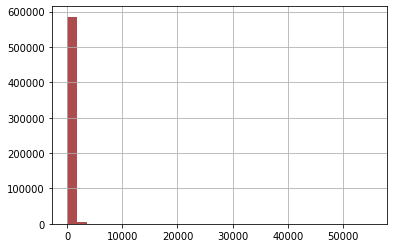

In [57]:
df['V310'].hist(bins=30,color='darkred',alpha=0.7)

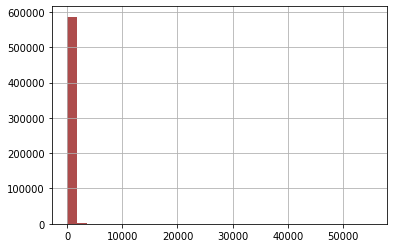

In [58]:
df['V130'].hist(bins=30,color='darkred',alpha=0.7)

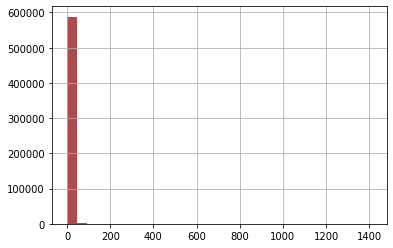

In [59]:
df['V96'].hist(bins=30,color='darkred',alpha=0.7)

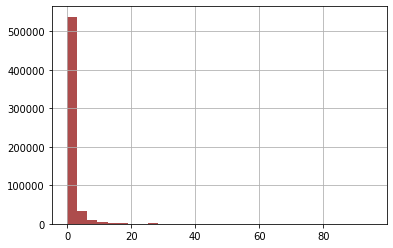

In [60]:
df['V285'].hist(bins=30,color='darkred',alpha=0.7)

In [61]:
df['V310'].fillna(df['V310'].median(), inplace=True)
df['V130'].fillna(df['V130'].median(), inplace=True)
df['V96'].fillna(df['V96'].median(), inplace=True)
df['V285'].fillna(df['V285'].median(), inplace=True)

In [62]:
for column in df.columns[1:]:
    if(df[column].isna().sum() > 0):
      print(column)

V10
V29
V35
V36
V48
V53
V54
V69
V75
V76
V90
V99
V282
V283


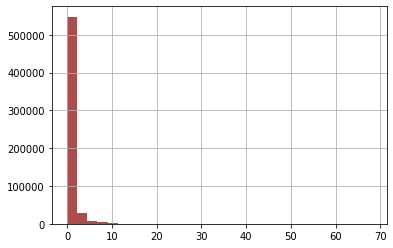

In [63]:
df['V283'].hist(bins=30,color='darkred',alpha=0.7)

In [64]:
df['V99'].fillna(df['V99'].median(), inplace=True)
df['V282'].fillna(df['V282'].median(), inplace=True)
df['V283'].fillna(df['V283'].median(), inplace=True)

In [65]:
for column in df.columns[1:]:
    if(df[column].isna().sum() > 0):
      df[column].fillna(df[column].mean(), inplace=True)

In [66]:
df.isna().sum().sum()

0

In [67]:
class OutlierRemoval: 
    def __init__(self, lower_quartile, upper_quartile):
        self.lower_whisker = lower_quartile - 1.5*(upper_quartile - lower_quartile)
        self.upper_whisker = upper_quartile + 1.5*(upper_quartile - lower_quartile)
    def removeOutlier(self, x):
        return (x if x <= self.upper_whisker and x >= self.lower_whisker else (self.lower_whisker if x < self.lower_whisker else (self.upper_whisker)))
        
for column in df.columns[1:]:
    if(df[column].dtype.kind in 'biufc' and column != 'isFraud'):
      outlier_remover = OutlierRemoval(df[column].quantile(0.25), df[column].quantile(0.75))
      df[column] = df[column].apply(outlier_remover.removeOutlier)

In [68]:
#One hot encoding
columns_e = []
for column in df.columns[1:]:
    if(df[column].dtype.kind not in 'biufc'):
        columns_e.append(column)
columns_e
df = pd.get_dummies(df, columns=columns_e)
n = len(df)

In [69]:
X_train = df.iloc[:(df.shape[0]-test.shape[0]),:]
X_test = df.iloc[(df.shape[0]-test.shape[0]):,:]

In [70]:
X_train.head()

,TransactionID,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C3,...,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M6_F,M6_T
0,3424175,49.00,5033,269.0,150.0,224.0,330.0,87.0,2.0,0.0,...,1,0,1,0,1,1,0,0,1,0
1,3206179,57.95,4527,376.0,150.0,226.0,441.0,87.0,2.0,0.0,...,1,0,1,0,1,1,0,0,1,0
2,3410455,115.95,2772,512.0,150.0,226.0,143.0,87.0,2.0,0.0,...,1,0,1,0,1,1,0,0,0,1
3,3058578,100.00,14290,512.0,150.0,226.0,177.0,87.0,1.0,0.0,...,1,0,1,0,1,1,0,0,1,0
4,3242131,95.00,12839,321.0,150.0,226.0,220.0,87.0,6.0,0.0,...,1,0,1,0,1,1,0,0,1,0


In [71]:
from sklearn.utils.random import sample_without_replacement

In [72]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [73]:
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)

In [125]:
pipeline = Pipeline(steps=[('o', ros), ('u', rus)])
X_res, y_res = rus.fit_resample(X_train, Y_train)

In [126]:
X_res.shape,y_res.shape

((30994, 228), (30994,))

#Randomized search CV for finding best parameters

In [76]:
from sklearn.model_selection import GridSearchCV

In [78]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [79]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [123]:
# from sklearn import linear_model
# C = np.logspace(0, 4, num=10)
# penalty = ['l1', 'l2']
# solver = ['liblinear', 'saga']
# hyperparameters = dict(C=C, penalty=penalty, solver=solver)
# logistic = linear_model.LogisticRegression()
# gridsearch = GridSearchCV(logistic, hyperparameters)
# best_model = gridsearch.fit(X_res, y_res)
# print(best_model.best_estimator_)

In [81]:
from sklearn import linear_model
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
from sklearn.model_selection import RandomizedSearchCV
randomizedsearch = RandomizedSearchCV(logistic, hyperparameters)
best_model_random = randomizedsearch.fit(X_res, y_res)
print(best_model_random.best_estimator_)

LogisticRegression(C=3593.813663804626, penalty='l1', solver='liblinear')


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [82]:
logistic = linear_model.LogisticRegression(C=3593.813663804626, penalty='l1', solver='liblinear')

In [83]:
logistic.fit(X_res, y_res)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(C=3593.813663804626, penalty='l1', solver='liblinear')

In [84]:
Y_pred = logistic.predict(X_test)

In [95]:
from sklearn.naive_bayes import GaussianNB
param_distributions_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel = RandomizedSearchCV(estimator=GaussianNB(), param_distributions=param_distributions_nb, verbose=1, cv=10, n_jobs=-1)
best_model_random = nbModel.fit(X_res, y_res)
print(best_model_random.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
GaussianNB(var_smoothing=3.5111917342151277e-07)


In [96]:
guassian = GaussianNB(var_smoothing=3.5111917342151277e-07)

In [97]:
guassian.fit(X_res, y_res)

GaussianNB(var_smoothing=3.5111917342151277e-07)

In [98]:
Y_pred = guassian.predict(X_test)

In [107]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = RandomizedSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
best_model_random = clf.fit(X_res, y_res)

In [108]:
print(best_model_random.best_estimator_)

MLPClassifier(alpha=0.05, learning_rate='adaptive', max_iter=100)


In [109]:
print(best_model_random.best_params_)

{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.05, 'activation': 'relu'}


In [110]:
mlp = MLPClassifier(max_iter=100, alpha=0.05, learning_rate='adaptive', hidden_layer_sizes = (100,), activation = 'relu', solver = 'adam')

In [112]:
mlp.fit(X_res, y_res)

MLPClassifier(alpha=0.05, learning_rate='adaptive', max_iter=100)

In [113]:
Y_pred = mlp.predict(X_test)

In [121]:
# Hyper Parameter Optimization

params={
 "learning_rate"    : [0.20] ,
 "max_depth"        : [12, 14, 16, 18],
 "min_child_weight" : [1, 2, 3, 4],
 "colsample_bytree" : [ 0.8],
 "gamma" : [0.2]
}

In [122]:
classifier=xgboost.XGBClassifier()

In [127]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [128]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_res,y_res)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 17 minutes and 19.65 seconds.


In [129]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 14,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.8}

In [130]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=14)

In [144]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.2, learning_rate=0.02,
       max_delta_step=0, max_depth=12, min_child_weight=2, missing=-1,
       n_estimators=2000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, eval_metric='auc')

In [145]:
classifier.fit(X_res, y_res)

XGBClassifier(colsample_bytree=0.4, eval_metric='auc', gamma=0.2,
              learning_rate=0.02, max_depth=12, min_child_weight=2, missing=-1,
              n_estimators=2000, silent=True)

In [146]:
Y_pred = classifier.predict(X_test)

In [147]:
Y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [148]:
Y_test = pd.DataFrame(Y_pred)

In [149]:
Y_test.columns = ['isFraud']
Y_test.index.name = "Id"

In [150]:
Y_test.describe()

,isFraud
count,147635.000000
mean,0.122830
std,0.328243
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [151]:
Y_test.head()

,isFraud
Id,
0,1
1,1
2,0
3,0
4,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f364dc06050>]],
      dtype=object)

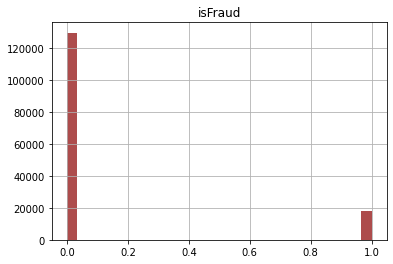

In [152]:
Y_test.hist(bins=30,color='darkred',alpha=0.7)

In [153]:
Y_test.to_csv("/content/fraud.csv") 